# Assignment 1: Question 4

Consider the _911.csv_ dataset containing information about emergency calls received on the 911 emergency line in America.

The data contains the following variables:

| variable      | Description                                        |
|------------|----------------------------------------------------|
| lat        | Latitude                                           |
| lng        | Longitude                                          |
| desc       | Description of the Emergency Call                 |
| zip        | Zipcode                                            |
| title      | Title code                                              |
| timeStamp  | YYYY-MM-DD HH:MM:SS                                |
| twp        | Township                                           |
| addr       | Address                                            |
| e          | Dummy variable (always 1)                         |

In [1]:
import pandas as pd

In [2]:
file_path = 'C:/STK/Assignment 1/911.csv'
df = pd.read_csv(file_path)

1. Retrieve the first 7 rows of the dataset.

In [3]:
first_seven_rows = df.head(7)
print("First five rows of 911 dataset:")
print(first_seven_rows)

First five rows of 911 dataset:
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6  40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC E

2. How many rows and columns does the dataset contain?

In [4]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 99492
Number of columns: 9


3. How many columns contain missing data?

In [5]:
missing_data_per_column = df.isna().sum()

columns_with_missing_data = missing_data_per_column[missing_data_per_column > 0]

num_columns_with_missing_data = len(columns_with_missing_data)

print(f"Number of columns with missing data: {num_columns_with_missing_data}")

Number of columns with missing data: 3


4. Which 5 zipcodes have the most 911 calls?

In [7]:
#printing columns
column_names = df.columns
print("Column names:")
for column in column_names:
    print(column)

Column names:
lat
lng
desc
zip
title
timeStamp
twp
addr
e


In [8]:
top_five_zipcodes = df['zip'].value_counts().head(5)
print("Top 5 zip codes with the most 911 calls:")
print(top_five_zipcodes)

Top 5 zip codes with the most 911 calls:
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64


5. Take a look at the 'title' column. How many unique title codes are there?

In [9]:
unique_title_codes = df['title'].nunique()
print(f"Number of unique title codes: {unique_title_codes}")

Number of unique title codes: 110


6. The title column gives information about the reason for the call. 

eg. 'EMS: BACK PAINS/INJURY' indicates that the _Reasons/Departments_ was EMS and the specific _Issue_ was BACK PAINS/INJURY.

All of the entries are formatted in this manner: **Reasons/Departments: Issue**

There are 3 possible _Reasons/Departments_: EMS, Fire, and Traffic and they are all indicated before the colon in the title code.

The obective is to create an new column called `Reason` that contains only the _Reasons/Departments_ information. ie. EMS, Fire, or Traffic.

a. Create function called `reason_extractor` that will select only the _Reasons/Departments_ from each title. 

Example: 'reason_extractor' must take in a string, eg. 'EMS: BACK PAINS/INJURY' and return only 'EMS'

(HINT: Consider the .split() method that is available for string variables.)

In [10]:
def reason_extractor(title):
    parts = title.split(':')
    return parts[0]

title = 'EMS: BACK PAINS/INJURY'
reason = reason_extractor(title)
print(f"Reason: {reason}")

Reason: EMS


Test your function on 'Fire: GAS-ODOR/LEAK'. If you give it this string, does it output 'Fire'?

In [11]:
title = 'Fire: GAS-ODOR/LEAK'
reason = reason_extractor(title)
print(f"Reason: {reason}")

Reason: Fire


b. Now use the .apply() method with a custom lambda expression to create a new column in your dataframe that is called "Reason" which contains the _Reasons/Departments_ information (ie. EMS, Fire, or Traffic only).

In [12]:
extract_reason = lambda title: title.split(':')[0]
df['Reason'] = df['title'].apply(extract_reason)
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  
0      REINDEE

7.  How many calls were received for each _Reasons/Departments_ based off of the new "Reason" column?

In [13]:
reason_counts = df['Reason'].value_counts()
print("Number of calls received per Reasons/Departments:")
print(reason_counts)

Number of calls received per Reasons/Departments:
EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64


8. Use `matplotlib` to plot a histogram showing the proportion of all the calls that were assigned to each _Reasons/Departments_. Remenber to give your graph a descriptive title and show all relevant labelling to ensure that your graph is meaningful and easy to understand. Also include gridlines in your plot for increased readability. 

In [14]:
import matplotlib.pyplot as plt

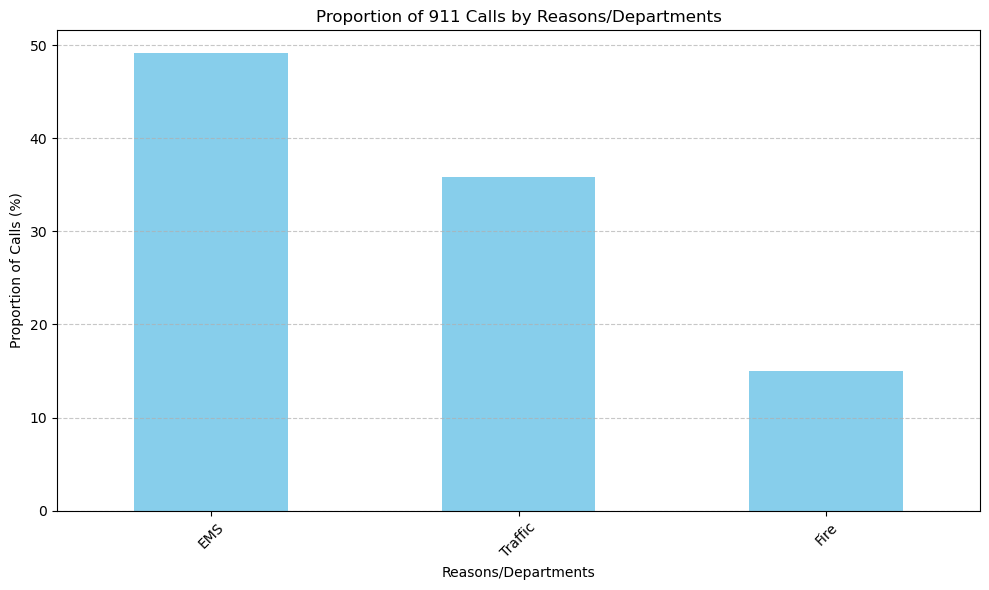

In [21]:
reason_counts = df['Reason'].value_counts()

# The proportion of calls for each Reasons/Departments
proportion = (reason_counts / len(df)) * 100

# Creating a histogram for the proportions
plt.figure(figsize=(10, 6))
proportion.plot(kind='bar', color='skyblue')

# Labels and title, and tilting the graph
plt.xlabel('Reasons/Departments')
plt.ylabel('Proportion of Calls (%)')
plt.title('Proportion of 911 Calls by Reasons/Departments')
plt.xticks(rotation=45)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


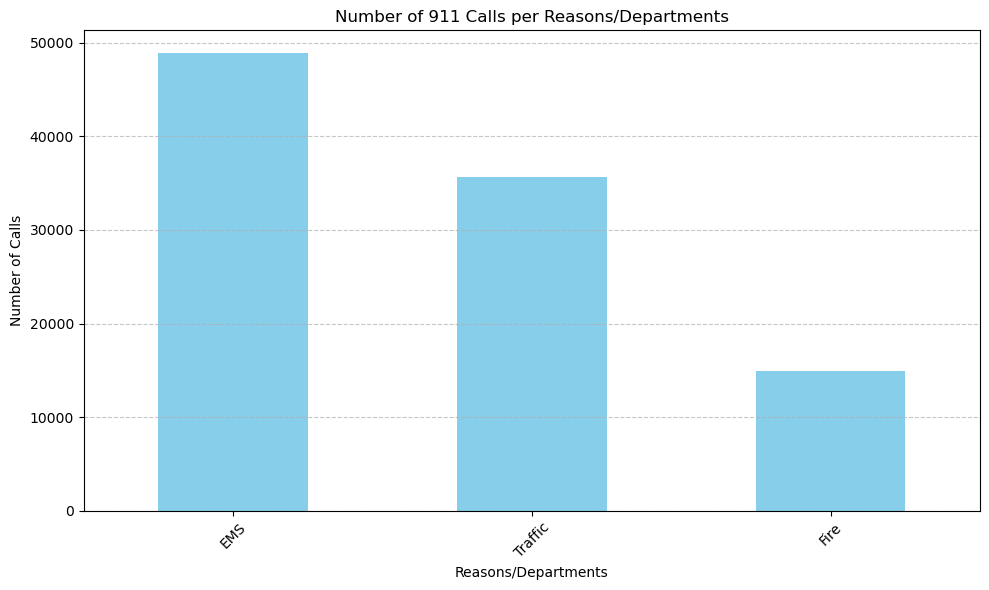

In [23]:
reason_counts = df['Reason'].value_counts()

plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Reasons/Departments')
plt.ylabel('Number of Calls')
plt.title('Number of 911 Calls per Reasons/Departments')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<h3><center>End of Question 4</center></h3>

<h2><center>End of Assignment 1</center></h2>